# Principal Component Analysis (PCA)

According to Wikipedia, PCA is a statistical procedure that uses an orthogonal transformation to convert a set of observations of possibly correlated variables (entities each of which takes on various numerical values) into a set of values of linearly uncorrelated variables called principal components.

Note: Features, Dimensions, and Variables are all referring to the same thing. You will find them being used interchangeably.

Useful for:
* Data visualization
* Speeding Machine Learning(ML) Algorithm

The prinicipal component is what represents the data when you project it into a lower dimension. So if you take data from a higher dimension into a lower dimension(usually three), the three dimensions are the the three Principal Components that capture (or hold) most of the variance (info) of your data.

Principal components have direction and magnitude.
- the direction represents across which principal axes the data is mostly spread out (or has most variance)
- the magnitude signifies the amount of variance that Principal Componenet captures.

Principal components are a straight line, and the first principal component holds the most variance. Each subsequent principal component has a lesser variance and is orthogonal to the last one.
Given a set of x correlated variables over y samples you get a set of u uncorrelated principal components over the same y samples.

Each principal component represents a percentage of total variation captured from the data.

https://www.datacamp.com/community/tutorials/principal-component-analysis-in-python

### Breast Cancer data exploration

In [1]:
# import breast cancer data set using sklearn
from sklearn.datasets import load_breast_cancer
breast = load_breast_cancer()
# call .data to fetch the data
breast_data = breast.data
breast_data.shape

(569, 30)

In [2]:
# fetch the labels (sorts them into malignant or benign) for the data by calling .target
breast_labels = breast.target
breast_labels.shape

(569,)

In [3]:
import numpy as np

# reshape the breast_labels to conatenate it with breast_data and create a DataFrame
labels = np.reshape(breast_labels,(569,1))

# concatenate the data along the second axis
final_breast_data = np.concatenate([breast_data,labels],axis=1)
final_breast_data.shape

(569, 31)

In [4]:
# import pandas to create the DataFrame
import pandas as pd

breast_dataset = pd.DataFrame(final_breast_data)

#print the features that are in the breast cancer dataset
features = breast.feature_names
features

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [5]:
# add the label field to the features array so that you can equate it with the column names in the datset
features_labels = np.append(features,'label')

#embed the column names tot he breast_dataset dataframe
breast_dataset.columns = features_labels

breast_dataset.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [6]:
# change the labels from the 0,1 format to benign and malignant using .replace
# use inplace=True to modify the breast_dataset DataFrame
breast_dataset['label'].replace(0, 'Benign',inplace=True)
breast_dataset['label'].replace(1, 'Malignant',inplace=True)

breast_dataset.tail()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,Benign
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,Benign
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,Benign
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,Benign
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,Malignant


### CIFAR-10 Data Exploration

In [33]:
# import the dataset using the deep learning library Keras
from keras.datasets import cifar10

# use the .load_data() method to download the data and store t in the Keras directory
# this might take a little while

# load the data and labels
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [34]:
# print the shape of training and testing images
print('Traning data shape:', x_train.shape)
print('Testing data shape:', x_test.shape)

# print the shape of the labels
y_train.shape,y_test.shape

Traning data shape: (50000, 32, 32, 3)
Testing data shape: (10000, 32, 32, 3)


((50000, 1), (10000, 1))

In [35]:
# Find the unique numbers from the train labels
classes = np.unique(y_train)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

Total number of outputs :  10
Output classes :  [0 1 2 3 4 5 6 7 8 9]


In [36]:
# use the magic (%) command to tell the jupyter notebook to show the output within the notebook itself
import matplotlib.pyplot as plt
%matplotlib inline

In [37]:
# create a dictionary that has class names with their corresponding categorical class labels
label_dict = {
 0: 'airplane',
 1: 'automobile',
 2: 'bird',
 3: 'cat',
 4: 'deer',
 5: 'dog',
 6: 'frog',
 7: 'horse',
 8: 'ship',
 9: 'truck',
}

Text(0.5, 1.0, '(Label: frog)')
Text(0.5, 1.0, '(Label: cat)')


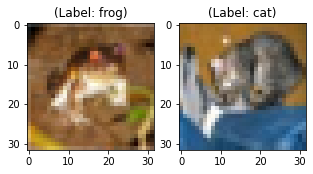

In [38]:
plt.figure(figsize=[5,5])

# Display the first image in training data
plt.subplot(121)
curr_img = np.reshape(x_train[0], (32,32,3))
plt.imshow(curr_img)
print(plt.title("(Label: " + str(label_dict[y_train[0][0]]) + ")"))

# Display the first image in testing data
plt.subplot(122)
curr_img = np.reshape(x_test[0],(32,32,3))
plt.imshow(curr_img)
print(plt.title("(Label: " + str(label_dict[y_test[0][0]]) + ")"))


# Data Visualization using PCA

## Visualizing the Breast Cancer data

In [14]:
# standardize and normalize the data using StandardScaler
# this will make sure that each feature of the data is normally distributed
# It will scale the distribution to a mean of zero and a STD of one
# I think this is like using the sampling distribution to get to a normal distribution

from sklearn.preprocessing import StandardScaler
x = breast_dataset.loc[:, features].values
x = StandardScaler().fit_transform(x) # normalizing the features

In [15]:
x.shape

(569, 30)

In [16]:
# check for a mean of 0 and a standard deviation of 1
np.mean(x), np.std(x)

(-6.826538293184326e-17, 1.0)

In [17]:
# convert the normalized features into a tabular format using a DataFrame
feat_cols = ['feature'+str(i) for i in range(x.shape[1])]

normalised_breast = pd.DataFrame(x,columns=feat_cols)

normalised_breast.tail()

,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,...,feature20,feature21,feature22,feature23,feature24,feature25,feature26,feature27,feature28,feature29
564,2.110995,0.721473,2.060786,2.343856,1.041842,0.219060,1.947285,2.320965,-0.312589,-0.931027,...,1.901185,0.117700,1.752563,2.015301,0.378365,-0.273318,0.664512,1.629151,-1.360158,-0.709091
565,1.704854,2.085134,1.615931,1.723842,0.102458,-0.017833,0.693043,1.263669,-0.217664,-1.058611,...,1.536720,2.047399,1.421940,1.494959,-0.691230,-0.394820,0.236573,0.733827,-0.531855,-0.973978
566,0.702284,2.045574,0.672676,0.577953,-0.840484,-0.038680,0.046588,0.105777,-0.809117,-0.895587,...,0.561361,1.374854,0.579001,0.427906,-0.809587,0.350735,0.326767,0.414069,-1.104549,-0.318409
567,1.838341,2.336457,1.982524,1.735218,1.525767,3.272144,3.296944,2.658866,2.137194,1.043695,...,1.961239,2.237926,2.303601,1.653171,1.430427,3.904848,3.197605,2.289985,1.919083,2.219635
568,-1.808401,1.221792,-1.814389,-1.347789,-3.112085,-1.150752,-1.114873,-1.261820,-0.820070,-0.561032,...,-1.410893,0.764190,-1.432735,-1.075813,-1.859019,-1.207552,-1.305831,-1.745063,-0.048138,-0.751207


### Projecting the thirty-dimensional Breast Cancer data to two-dimensional principal components

In [18]:
from sklearn.decomposition import PCA
# pass in the number of components we want
pca_breast = PCA(n_components=2)
# call fit_transform on the aggregate data
principalComponents_breast = pca_breast.fit_transform(x)
# several components represent the lower dimension where the higher dimension
# data will be projected

In [19]:
# create a DataFrame that will have the principal component values for all 569 samples
principal_breast_Df = pd.DataFrame(data = principalComponents_breast
             , columns = ['principal component 1', 'principal component 2'])
principal_breast_Df.tail()

,principal component 1,principal component 2
564,6.439315,-3.576817
565,3.793382,-3.584048
566,1.256179,-1.902297
567,10.374794,1.672010
568,-5.475243,-0.670637


In [20]:
# find the explained_variance_ratio 
# this is the amount of info/variance each principal component now holds
print('Explained variation per principal component: {}'.format(pca_breast.explained_variance_ratio_))

Explained variation per principal component: [0.44272026 0.18971182]


Things to note: principal component 1 holds 44.2% of the variance/info while principal component 2 holds only 19% of the variance/info. So while projecting the thirty-dimensional data to a two-dimensional data 36.8% of information was lost.

<Figure size 432x288 with 0 Axes>

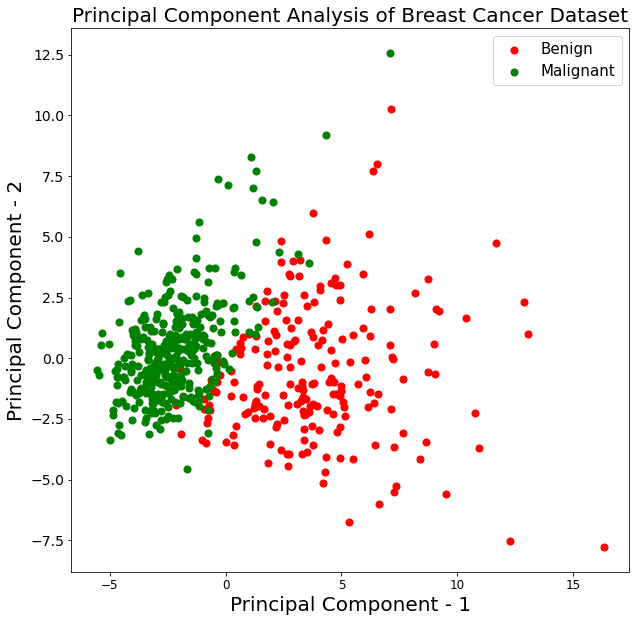

In [21]:
# Plot the visualization of the 569 samples along the principal component -1
# and principal component-2 axis

plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component - 1',fontsize=20)
plt.ylabel('Principal Component - 2',fontsize=20)
plt.title("Principal Component Analysis of Breast Cancer Dataset",fontsize=20)
targets = ['Benign', 'Malignant']
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = breast_dataset['label'] == target
    plt.scatter(principal_breast_Df.loc[indicesToKeep, 'principal component 1']
               , principal_breast_Df.loc[indicesToKeep, 'principal component 2'], c = color, s = 50)

plt.legend(targets,prop={'size': 15})


What do we see? You can sort of separate out the malignant and benign classes when projected into a two-dimensional space. Also the benign class is more spread out compared to the malignant class.

## Visualizing the CIFAR-10 data

In [39]:
# check the max and min values of the training images and normalize the 
# pixels between 0 and 1 inclusive
np.min(x_train),np.max(x_train)


(0, 255)

In [40]:
x_train = x_train/255.0

In [41]:
np.min(x_train),np.max(x_train)


(0.0, 1.0)

In [42]:
x_train = x_train/255.0

In [43]:
np.min(x_train),np.max(x_train)

(0.0, 0.00392156862745098)

In [44]:
x_train.shape

(50000, 32, 32, 3)

In [45]:
# reshape the image dimensions from three to one (flatten the images)
x_train_flat = x_train.reshape(-1,3072)

In [46]:
# create a DataFrame to hold the pixel values of the images and their
# respective labels in a row-column format

feat_cols = ['pixel'+str(i) for i in range(x_train_flat.shape[1])]
df_cifar = pd.DataFrame(x_train_flat,columns=feat_cols)
df_cifar['label'] = y_train
print('Size of the dataframe: {}'.format(df_cifar.shape))

Size of the dataframe: (50000, 3073)


In [47]:
df_cifar.head()
#PCA is applied on all columns except the label column

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel3063,pixel3064,pixel3065,pixel3066,pixel3067,pixel3068,pixel3069,pixel3070,pixel3071,label
0,0.000907,0.000953,0.000969,0.000661,0.000707,0.000692,0.000769,0.000738,0.000661,0.001046,...,0.003322,0.002830,0.002153,0.002322,0.001815,0.001292,0.001892,0.001415,0.001107,6
1,0.002368,0.002722,0.002876,0.001938,0.002107,0.002092,0.001615,0.001599,0.001461,0.001569,...,0.002199,0.002045,0.002138,0.002199,0.002061,0.002184,0.002199,0.002045,0.002215,9
2,0.003922,0.003922,0.003922,0.003891,0.003891,0.003891,0.003891,0.003891,0.003891,0.003891,...,0.001200,0.001307,0.001276,0.001215,0.001307,0.001276,0.001230,0.001323,0.001292,9
3,0.000431,0.000384,0.000154,0.000569,0.000523,0.000292,0.000584,0.000538,0.000308,0.000646,...,0.000830,0.000723,0.000431,0.000969,0.000861,0.000569,0.001107,0.001000,0.000707,4
4,0.002614,0.002768,0.003045,0.002584,0.002737,0.003014,0.002722,0.002845,0.003122,0.002814,...,0.001153,0.001215,0.001261,0.001092,0.001153,0.001200,0.001123,0.001184,0.001230,1


In [48]:
# create the PCA method and pass it to two-dimensional components
pca_cifar = PCA(n_components=2)
principalComponents_cifar = pca_cifar.fit_transform(df_cifar.iloc[:,:-1])
# convert the principal components for each image from a numpy array to a pandas DataFrame
principal_cifar_Df = pd.DataFrame(data = principalComponents_cifar
             , columns = ['principal component 1', 'principal component 2'])
principal_cifar_Df['y'] = y_train

principal_cifar_Df.head()

,principal component 1,principal component 2,y
0,-0.025102,0.010702,6
1,0.003254,-0.003725,9
2,0.030315,-0.045185,9
3,-0.040580,0.000042,4
4,-0.010297,-0.019487,1


In [49]:
print('Explained variation per principal component: {}'.format(pca_cifar.explained_variance_ratio_))

Explained variation per principal component: [0.2907663  0.11253144]


<AxesSubplot:xlabel='principal component 1', ylabel='principal component 2'>

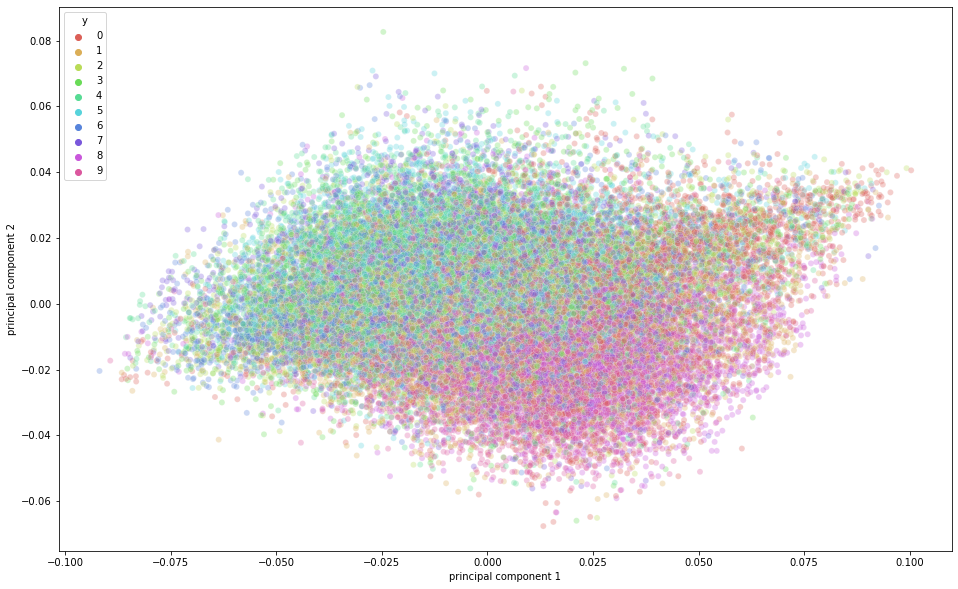

In [50]:
import seaborn as sns
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="principal component 1", y="principal component 2",
    hue="y",
    palette=sns.color_palette("hls", 10),
    data=principal_cifar_Df,
    legend="full",
    alpha=0.3
)


You can see some structure when projected along the two principal component axis so some variation was retianed. Also points in the same class seem to be close to each other and points(images) that are very different are further away from each other (see greens and reds).

# Speed Up Deep Learning Training using PCA with CIFAR-10 Dataset